In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
import zipfile

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
import zipfile
import re

In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
archive = zipfile.ZipFile('data/Reviews.zip')
data = pd.read_csv(archive.open('Reviews.csv'))

In [5]:
data.Text = data.Text.str.lower()

In [6]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...


In [7]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

In [8]:
def get_corpus(data):
  corpus = []
  for phrase in data:
    for word in phrase:
      corpus.append(word)
  return corpus

In [9]:
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white', stopwords=STOPWORDS,
                          width=3000, height=2500, max_words=200,
                          random_state=42).generate(str_corpus(corpus))
    return wordCloud

In [10]:
def prepare_data(data):
    def clean_text(text):
        stop_words = set(stopwords.words('english'))
        stop_words.update([el for el in punctuation])
        # stop_words.update("n't")
        
        pattern = '<.+?>'
        
        text = re.sub(pattern, ' ', text)  # cleaning from html tags 
        text = word_tokenize(text)
        text = [word for word in text if word not in stop_words]
        return text
    
    result = data.apply(clean_text)
    return result

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data.Text, data.Score, train_size=0.8
    )

In [12]:
# X_train = prepare_data(X_train)
X_test = prepare_data(X_test)

<Axes: >

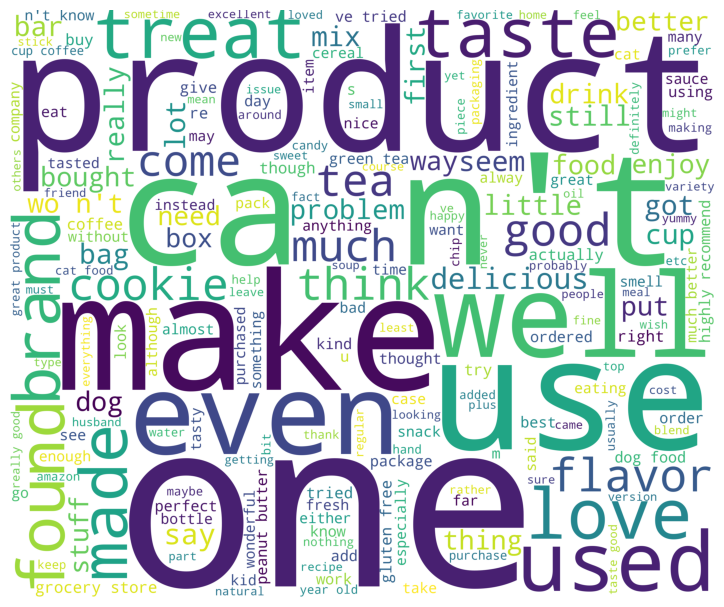

In [13]:
corpus = get_corpus(X_test)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [14]:
corpus = pd.Series(corpus)
corpus

0              dogs
1              love
2            newman
3                's
4            turkey
             ...   
4801217      tongue
4801218       teeth
4801219    anything
4801220        else
4801221       touch
Length: 4801222, dtype: object

In [15]:
word_counts = corpus.value_counts()

In [16]:
word_counts.head()

n't     59715
's      59700
like    50822
good    39714
one     34923
dtype: int64

In [17]:
X_train.head()

477408    the vue cups sampler was great.  i just got my...
96700     it's always difficult to get someone an annive...
227368    i love this brand ramen, and can't find them i...
509590    i've been drinking stash moroccan mint green t...
58997     got it today and tried it but the color doesn'...
Name: Text, dtype: object

In [18]:
'we' in stopwords.words('english')

True

In [38]:
corpus.head()

0      dogs
1      love
2    newman
3        's
4    turkey
dtype: object

In [54]:
for el in X_train.iloc[100:201]:
    if "n't know" in el:
        print(el, end='\n\n') 

back about 30 years ago, slim jim made some damn fine beef sticks. they were probably the best that i can recall ever having since.<br /><br />todays greasy orange slim jim is total garbage, in comparison to what it used to be a few decades ago. i don't know when their recipe changed, but i think it was around 25 years ago.<br /><br />those of you that think slim jims are good now would be shocked and disgusted if you were able to try the old recipe slim jim beef sticks. (which sadly are no longer made)

this is my favorite k-cup!  i keep trying others but i always come back to this one. i'm not a coffee snob and i really don't know much about coffee but i know this tastes great! it smells amazing and isn't bitter.  this is a little harder to find in stores but amazon's prices beat the stores anyway.

i am so thrilled to find these on amazon! i don't know why it didn't occur to me to look earlier. i love salt and vinegar potato chips and these definitely hit the same flavor spot. but i